
Факторный анализ

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn import preprocessing



In [ ]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#Подготавливаем данные

Необходимо заменить текстовые поля числами. Сделаю это с помощью "ключей"

In [ ]:
jobs = list(np.unique(df['job']))
fam = list(np.unique(df['marital']))
ed =list(np.unique(df['education']))
dflt =list(np.unique(df['default']))
hous = list(np.unique(df['housing']))
loan = list(np.unique(df['loan']))
contact = list(np.unique(df['contact']))
month = list(np.unique(df['month']))
poutcome = list(np.unique(df['poutcome']))
y = ['no', 'yes']
df1 = df

In [ ]:
for i in range (45211):
   df1['job'][i] = float(jobs.index(df['job'][i]))
   df1['marital'][i] = float(fam.index(df['marital'][i]))
   df1['education'][i] = float(ed.index(df['education'][i]))
   df1['housing'][i] = float(hous.index(df['housing'][i]))
   df1['loan'][i] = float(loan.index(df['loan'][i]))
   df1['contact'][i] = float(contact.index(df['contact'][i]))
   df1['month'][i] = float(month.index(df['month'][i]))
   df1['poutcome'][i] = float(poutcome.index(df['poutcome'][i]))
   df1['default'][i] = float(dflt.index(df['default'][i]))
   df1['y'][i] = float(y.index(df['y'][i]))
df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


#Task1
Построить модель распознавания отклика

Делим на отклик и предикторы. Стандартизируем предикторы

In [ ]:
X = df1.iloc[:, :-1].values  
x = pd.DataFrame((preprocessing.StandardScaler().fit_transform(X)).astype('float64'))
y = df1.iloc[:, 16].values.astype('int64')  
X_train, X_holdout, y_train, y_holdout = train_test_split(x,y, test_size=0.3,random_state=17)

Ищем лучшие параметры с помощью GridSearchCv

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grid_param = {  
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 4, 6]
}

model = XGBClassifier(random_state=17)
xgb_res = GridSearchCV(error_score='raise',
                        estimator=model, param_grid=grid_param, cv=5, 
                               pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

xgb_res.fit(X_train, y_train)

xgb_res.best_params_, xgb_res.best_score_

({'max_depth': 3, 'n_estimators': 1000}, 0.9083011199730822)

In [ ]:
#Тренируем модель на полученных параметрах
xgb_res.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=17, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 4, 6],
                         'n_estimators': [100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_

Проверим, нужна ли калибровка

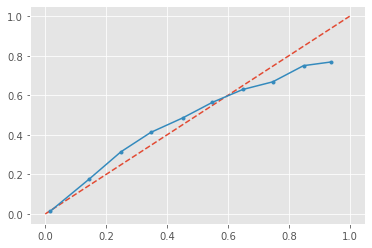

In [ ]:
from sklearn.calibration import calibration_curve
from matplotlib import pyplot
probs = xgb_res.predict_proba(X_holdout)[:,1]
fop, mpv = calibration_curve(y_holdout, probs, n_bins=10)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

Отклонения имеются, но не критичные. Калибровка не нужна

#Часть 2 

In [ ]:
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA

 Посмотрим на собственные числа, чтобы определить число главных компонент. Будем сравнивать их с 1 (критерий Кайзера)

In [ ]:
pca = PCA(n_components=16)
zzz = pca.fit(x)
print((pca.explained_variance_ratio_ * x.shape[1]).round(2))

[2.38 1.69 1.49 1.22 1.13 1.01 0.98 0.93 0.91 0.84 0.82 0.77 0.62 0.55
 0.52 0.14]


Надо оставить 6 факторов

In [ ]:
fa = FactorAnalyzer( n_factors = 6, rotation='varimax',  method = 'minres', 
                    impute = 'mean',  is_corr_matrix=  False)

Тренируем 

In [ ]:
fa.fit(x)

FactorAnalyzer(bounds=(0.005, 1), impute='mean', is_corr_matrix=False,
               method='minres', n_factors=6, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

Смотрим распределение факторов

In [ ]:
dfff = pd.DataFrame(X)
faLoadingsV = pd.DataFrame(np.vstack((fa.loadings_.T, fa.get_uniquenesses())),
                          index = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4', 'Factor 5', 'Factor 6',
                                   'Уникальность'], 
                           columns = list(df1.iloc[:, :-1].columns.values))
faLoadingsV.round(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Factor 1,-0.006,-0.013,0.011,0.022,-0.025,0.011,0.115,-0.003,-0.272,-0.077,0.048,-0.010,-0.040,0.894,0.509,-0.954
Factor 2,0.988,-0.033,-0.412,-0.122,0.011,0.068,-0.144,0.032,0.045,-0.004,0.006,-0.011,-0.024,-0.028,0.000,0.006
Factor 3,0.014,0.018,-0.018,0.020,0.033,-0.024,-0.009,0.032,0.028,0.165,-0.059,-0.092,0.990,-0.063,-0.017,0.067
Factor 4,-0.061,-0.094,-0.008,-0.051,0.014,0.011,0.354,0.011,0.506,-0.015,0.732,-0.006,-0.066,-0.017,-0.009,0.023
Factor 5,-0.001,0.342,0.148,0.411,0.022,0.116,-0.261,-0.044,-0.168,0.068,-0.035,0.005,-0.059,-0.065,0.020,0.004
Factor 6,0.135,0.029,0.067,0.076,-0.224,0.255,-0.088,-0.339,0.029,-0.031,-0.013,0.039,0.071,0.036,0.032,-0.032
Уникальность,0.002,0.872,0.804,0.807,0.947,0.916,0.764,0.881,0.638,0.961,0.458,0.990,0.005,0.190,0.739,0.084


Формируем факторы в качестве новых переменных

In [ ]:
factors_2 = pd.DataFrame(fa.transform(x), columns = ['F1', 'F2','F3', 'F4','F5', 'F6'])
factors_2

,F1,F2,F3,F4,F5,F6
0,-0.447498,1.624014,-0.516665,1.023015,0.115500,0.488347
1,-0.472642,0.327560,-0.531897,0.999411,0.130059,0.248264
2,-0.449548,-0.572895,-0.515156,1.016900,-0.665762,-0.897343
3,-0.447778,0.596301,-0.515884,1.074253,0.264045,0.340258
4,-0.474449,-0.776937,-0.498570,0.792988,1.474560,0.337422
...,...,...,...,...,...,...
45206,-0.367360,0.910635,0.143847,0.315128,1.100968,0.380237
45207,-0.399967,2.832666,-0.196918,0.243130,-0.130433,0.293023
45208,0.940116,2.801209,0.775347,0.287507,0.333183,1.095743
45209,-0.390039,1.489587,0.428039,0.594631,-0.074227,0.404089


Собираем предыдущие предикторы и факторы для работы с новой моделью

In [ ]:
X = pd.DataFrame(X)
df_full = X.merge(factors_2, left_index=True, right_index=True)
df_full

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,F1,F2,F3,F4,F5,F6
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,-0.447498,1.624014,-0.516665,1.023015,0.115500,0.488347
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,-0.472642,0.327560,-0.531897,0.999411,0.130059,0.248264
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,-0.449548,-0.572895,-0.515156,1.016900,-0.665762,-0.897343
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,-0.447778,0.596301,-0.515884,1.074253,0.264045,0.340258
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,-0.474449,-0.776937,-0.498570,0.792988,1.474560,0.337422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,-0.367360,0.910635,0.143847,0.315128,1.100968,0.380237
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,-0.399967,2.832666,-0.196918,0.243130,-0.130433,0.293023
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,0.940116,2.801209,0.775347,0.287507,0.333183,1.095743
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,-0.390039,1.489587,0.428039,0.594631,-0.074227,0.404089


#Проверка улучшения модели

Модель для нового датасета с факторами

In [ ]:
#X = df.iloc[:, :-1].values  
x1 = pd.DataFrame((preprocessing.StandardScaler().fit_transform(df_full)).astype('float64'))
#y1 = df1.iloc[:, 16].values.astype('int64')  
X_train1, X_holdout1, y_train1, y_holdout1 = train_test_split(x1,y, test_size=0.3,random_state=17)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

xgb_res1 = GridSearchCV(error_score='raise',
                        estimator=model, param_grid=grid_param, cv=2, 
                               pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

xgb_res1.fit(X_train1, y_train1)

xgb_res1.best_params_, xgb_res1.best_score_

({'max_depth': 3, 'n_estimators': 500}, 0.904983175545294)

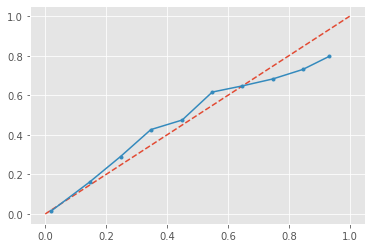

In [ ]:
probs = xgb_res1.predict_proba(X_holdout1)[:,1]
fop, mpv = calibration_curve(y_holdout1, probs, n_bins=10)
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot model reliability
pyplot.plot(mpv, fop, marker='.')
pyplot.show()

Точности

In [ ]:
print('Befor factor ', accuracy_score(y_holdout, xgb_res.predict(X_holdout)))
print('After factor ', accuracy_score(y_holdout1, xgb_res1.predict(X_holdout1)))

Befor factor  0.9060749041580655
After factor  0.9070333235033913
